# Explore Course Roster
This notebook reads in the course roster Google Sheet and explores the datafile. To run this notebook requires access to the course Google Drive.

## Description of Program
- program:    URSC645_3av1_ExploreRoster
- task:       Explore google sheet course roster
- Version:    2025-01-16
- Version:    2026-01-13 - added experience over time
- project:    Urban Analytics URSC 645
- funding:	  Texas A&M University Department of Landscape Architecture and Urban Planning
- author:     Nathanael Rosenheim \ Jan 23, 2021

## Step 0: Good Housekeeping

In [1]:
# 1. Import all packages
import pandas as pd     # For obtaining and cleaning tabular data
import os # For saving output to path

In [2]:
# 2. Check versions
import sys
print("Python Version     ", sys.version)
print("pandas version: ", pd.__version__)

Python Version      3.12.8 | packaged by conda-forge | (main, Dec  5 2024, 14:06:27) [MSC v.1942 64 bit (AMD64)]
pandas version:  2.2.3


In [3]:
# 3. Check working directory
# Get information on current working directory (getcwd)
os.getcwd()

'c:\\Users\\nathanael99\\MyProjects\\GitHub\\URSC645\\Posted'

# Step 1: Obtain Data
Data from a Google Sheet can be read in directly to notebook. 
Note the sheet must be accessible, in the case of this notebook the link was temporarily set to "access to anyone with link". 
Once the notebook was run the link was changed back to restricted.

In [4]:
url =  'https://docs.google.com/spreadsheets/d/1HCtZfY-8l8dNZT2A8AUCcyr19sjrMTvny_U3qWobuGA/export?format=csv'
df = pd.read_csv(url) 

In [5]:
# to protect privacy of the data, I will not display the data
# df.head() 

In [6]:
# print column headings
print(df.columns)

Index(['fname', 'lname', 'pname', 'pnmhelp', 'pgp', 'date', 'gmail', 'htown',
       'major', 'audit', 'phd', 'prelim', 'prpsl', 'egrad', 'os', 'monitors',
       'stataversion', 'expexcel', 'expgdocs', 'expsas', 'expstata', 'expr',
       'exppy', 'expjnb', 'dcrrnt'],
      dtype='object')


# Step 3: Clean Data

In [7]:
# add a year variable based on the date
df['year'] = pd.DatetimeIndex(df['date']).year
# count the number of observations per year
# sort by year
year_counts = df['year'].value_counts().sort_index()
year_counts

year
2019    12
2020     6
2021    14
2022     2
2023     3
2024     6
2025     5
2026     4
Name: count, dtype: int64

# Step 3: Explore Data

In [8]:
# experience variables start with exp
experience_vars = [col for col in df.columns if 'exp' in col]
df[experience_vars].describe().T

,count,mean,std,min,25%,50%,75%,max
expexcel,34.0,3.970588,0.968763,1.0,4.0,4.0,5.00,5.0
expgdocs,34.0,4.529412,0.614733,3.0,4.0,5.0,5.00,5.0
expsas,52.0,0.326923,1.042643,0.0,0.0,0.0,0.00,5.0
expstata,52.0,2.500000,1.590412,0.0,1.0,2.5,4.00,5.0
expr,50.0,0.940000,1.235694,0.0,0.0,0.0,2.00,4.0
exppy,50.0,0.900000,1.343921,0.0,0.0,0.0,2.00,5.0
expjnb,32.0,0.875000,1.385408,0.0,0.0,0.0,1.25,5.0


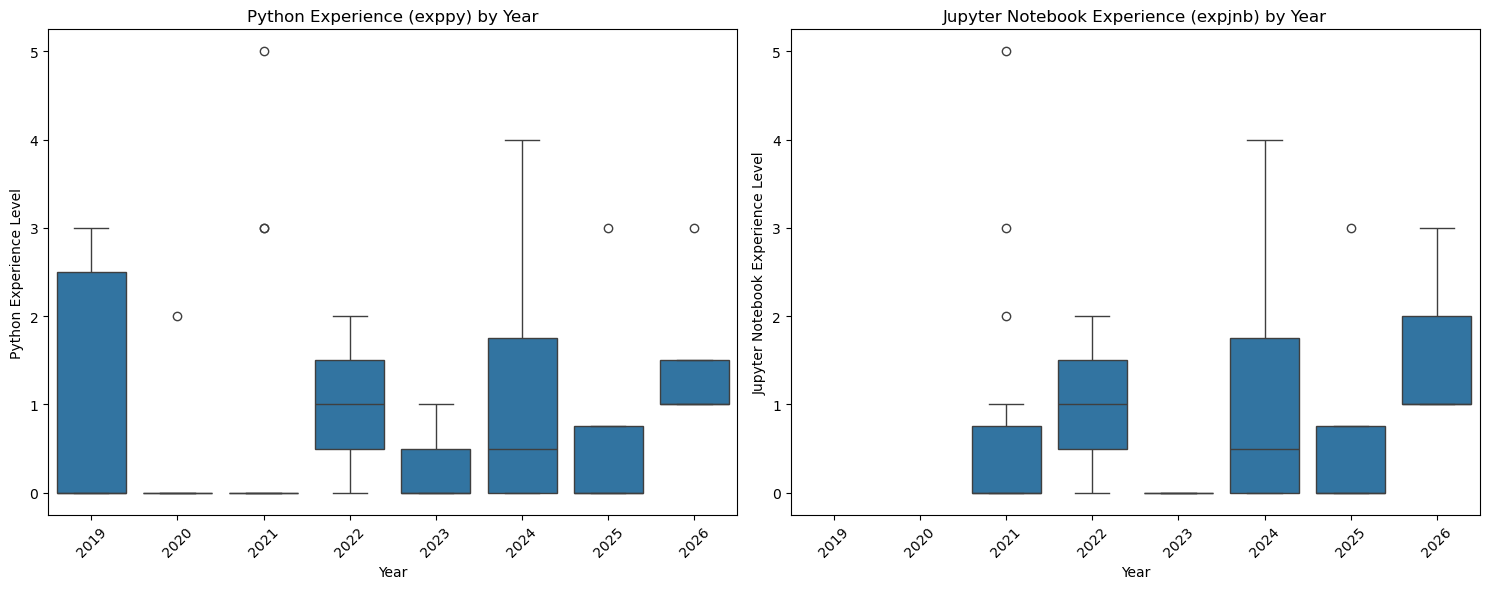

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Code written with Claude Sonnet 4 using VS Code Chat Agent

# Create whisker plots for exppy and expjnb by year
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Boxplot for Python experience (exppy) by year
sns.boxplot(data=df, x='year', y='exppy', ax=axes[0])
axes[0].set_title('Python Experience (exppy) by Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Python Experience Level')
axes[0].tick_params(axis='x', rotation=45)

# Boxplot for Jupyter Notebook experience (expjnb) by year
sns.boxplot(data=df, x='year', y='expjnb', ax=axes[1])
axes[1].set_title('Jupyter Notebook Experience (expjnb) by Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Jupyter Notebook Experience Level')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

<Axes: title={'center': 'Number of students per year'}, xlabel='year'>

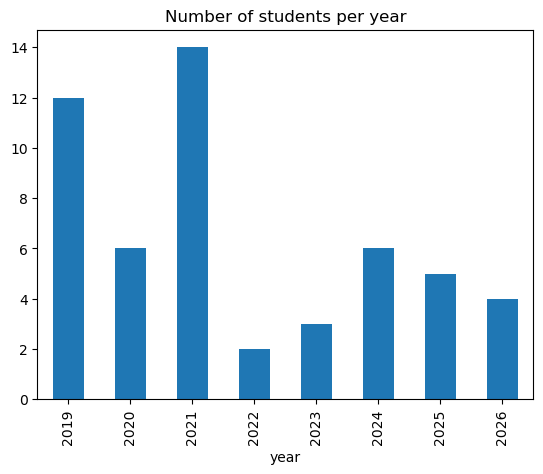

In [9]:
# count of students by year
# make histogram based on year counts
year_counts.plot(kind='bar', title='Number of students per year')

# Output files
No output files.

In [10]:
# Save Work at this point as CSV
#savefile = programname+"/"+programname+".csv"
#df.to_csv(savefile, index=False)